# Importamos librerías y cargamos DataFrames

In [5]:
import pandas as pd
import os
import regex as re
import time
import math

import plotly
import matplotlib.pyplot as plt
from   matplotlib.figure import Figure
import seaborn as sns
sns.set_theme(style="whitegrid")


In [6]:

path_import = "data/"

W_CP_df = pd.read_csv(f"{path_import}W_CP_df.csv" ,index_col=0)
W_B_df  = pd.read_csv(f"{path_import}W_B_df.csv"  ,index_col=0)
M_CP_df = pd.read_csv(f"{path_import}M_CP_df.csv" ,index_col=0)
M_B_df  = pd.read_csv(f"{path_import}M_B_df.csv"  ,index_col=0)
H_CP_df = pd.read_csv(f"{path_import}H_CP_df.csv" ,index_col=0)
H_B_df  = pd.read_csv(f"{path_import}H_B_df.csv"  ,index_col=0)


# Analizamos los tiempos por semanas:

In [7]:
W_B_df.head()

,origin,destiny,dow,mean_time_s,std_time_s
0,125,87,2,799,600
1,85,39,2,1350,471
2,127,96,2,470,322
3,128,86,2,706,337
4,36,67,1,1283,340


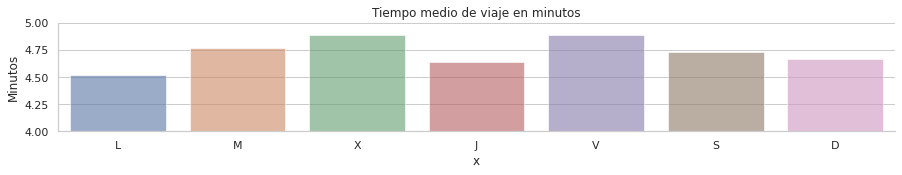

In [8]:
searchby  = "barrios"
#searchby  = "codigos_postales"
origen    = 1
destino   = 2

if searchby == "barrios" :
    df = W_B_df.copy()
elif searchby == "codigos_postales" :
    df = W_CP_df.copy()

df = df[(df.origin   == origen    ) &
        (df.destiny  == destino   ) ]
df = df.reset_index(drop=True)
df_to_plot = pd.DataFrame()
df_to_plot["x"] = df["dow"]
df_to_plot["y"] = df["mean_time_s"]/60

plt.figure(figsize = (15,2))
fig = sns.barplot( data=df_to_plot , x="x", y="y", ci="sd", palette="deep", alpha=.6 );
fig.set_title("Tiempo medio de viaje en minutos")
fig.set_xticklabels(['L','M','X','J','V','S','D'])
fig.set_ylabel("Minutos")
plt.ylim(math.floor(df_to_plot["y"].min()),math.ceil(df_to_plot["y"].max()))
sns.despine()


# Analizamos los tiempos por horas:

In [9]:
H_B_df.head()

,origin,destiny,hod,mean_time_s_ALL,std_time_s_ALL,mean_time_s_WD,std_time_s_WD,mean_time_s_WE,std_time_s_WE
0,43,20,16,712,241,767,235,586,204
1,40,50,16,1075,317,1096,339,988,178
2,110,18,0,884,345,965,404,830,288
3,45,74,1,853,155,853,155,853,155
4,127,8,13,978,297,990,326,956,236


In [10]:
H_CP_df.head()

,origin,destiny,hod,mean_time_s_ALL,std_time_s_ALL,mean_time_s_WD,std_time_s_WD,mean_time_s_WE,std_time_s_WE
0,248,13,18,1585,526,1585,526,1585,526
1,185,34,22,693,199,661,183,803,210
2,271,273,11,490,243,480,250,523,214
3,272,263,11,796,376,874,416,663,244
4,248,1,1,1252,117,1252,117,1252,117


In [11]:
searchby  = "barrios"
searchby  = "codigos_postales"
origen    = 1
destino   = 2

if searchby == "barrios" :
    df = H_B_df.copy()
elif searchby == "codigos_postales" :
    df = H_CP_df.copy()
    
df = df[(df.origin   == origen    ) &
        (df.destiny  == destino   ) ]
df = df.sort_values('hod')
df = df.reset_index(drop=True)
df.head()

,origin,destiny,hod,mean_time_s_ALL,std_time_s_ALL,mean_time_s_WD,std_time_s_WD,mean_time_s_WE,std_time_s_WE
0,1,2,0,402,218,389,217,417,218
1,1,2,1,409,239,407,281,410,208
2,1,2,2,423,253,437,280,415,235
3,1,2,3,394,216,382,185,400,230
4,1,2,4,411,224,406,215,414,229


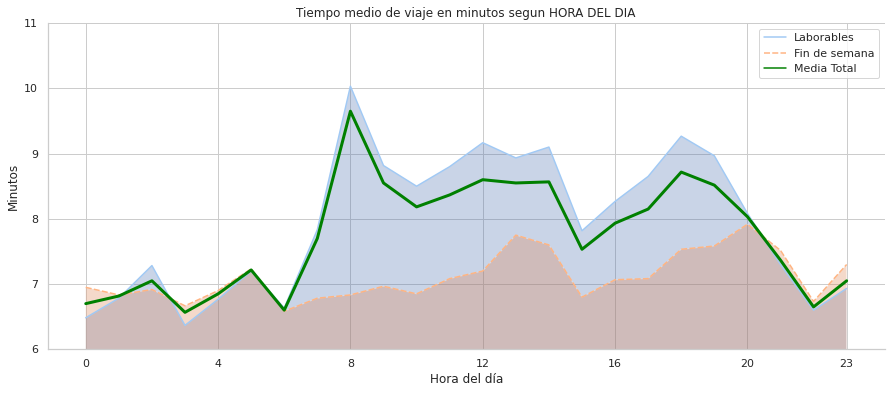

In [12]:
df_to_plot = pd.DataFrame()
df_to_plot["x"]             = df["hod"]
df_to_plot["Media Total"  ] = df["mean_time_s_ALL"]/60
df_to_plot["Laborables"   ] = df["mean_time_s_WD" ]/60
df_to_plot["Fin de semana"] = df["mean_time_s_WE" ]/60

ymin = df_to_plot[["Media Total","Laborables","Fin de semana"]].min().min()
ymax = df_to_plot[["Media Total","Laborables","Fin de semana"]].max().max()
ylim_low  = math.floor( ymin-0.1*(ymax-ymin) )
ylim_high = math.ceil(  ymax+0.1*(ymax-ymin) )

plt.figure(figsize = (15,6))
fig = sns.lineplot(data=df_to_plot.drop(columns="Media Total").set_index("x"), palette="pastel", linewidth=1.5 )
fig.fill_between( df_to_plot["x"]  , 0 , df_to_plot["Laborables"], alpha=0.3)
fig.fill_between( df_to_plot["x"]  , 0 , df_to_plot["Fin de semana"], alpha=0.3)
fig = sns.lineplot(data=df_to_plot.drop(columns=["Laborables","Fin de semana"]).set_index("x"), linewidth=3 , palette=['green'] )

fig.set_title("Tiempo medio de viaje en minutos segun HORA DEL DIA")
fig.set_xlabel("Hora del día")
fig.set_ylabel("Minutos")
plt.xticks([0,4,8,12,16,20,23])
plt.ylim( ylim_low , ylim_high )
sns.despine()

# Analizamos los tiempos mensualmente:

In [13]:
M_B_df.head()

,origin,destiny,yr-month,date,mean_time_s_ALL,std_time_s_ALL,mean_time_s_WD,std_time_s_WD,mean_time_s_WE,std_time_s_WE
0,128,10,2017-1,2017-01-01,1059,405,1078,411,1015,387
1,125,40,2017-1,2017-01-01,1317,580,1358,700,1258,329
2,127,20,2017-1,2017-01-01,991,452,1051,455,857,416
3,126,30,2017-1,2017-01-01,987,343,1029,340,908,333
4,15,107,2017-1,2017-01-01,603,393,611,315,592,484


In [14]:
M_CP_df.head()

,origin,destiny,yr-month,date,mean_time_s_ALL,std_time_s_ALL,mean_time_s_WD,std_time_s_WD,mean_time_s_WE,std_time_s_WE
0,45,9,2017-3,2017-03-01,653,399,691,423,579,333
1,46,54,2017-3,2017-03-01,1106,460,1192,470,880,340
2,1,12,2017-3,2017-03-01,467,294,499,316,420,250
3,15,264,2017-3,2017-03-01,1226,313,1291,313,1149,295
4,47,44,2017-3,2017-03-01,304,264,316,270,283,252


In [15]:
searchby  = "barrios"
#searchby  = "codigos_postales"
origen    = 1
destino   = 2

if searchby == "barrios" :
    df = M_B_df.copy()
elif searchby == "codigos_postales" :
    df = M_CP_df.copy()
    
df = df[(df.origin   == origen    ) &
        (df.destiny  == destino   ) ]
df = df.sort_values('date')
df = df.reset_index(drop=True)
df.head()

,origin,destiny,yr-month,date,mean_time_s_ALL,std_time_s_ALL,mean_time_s_WD,std_time_s_WD,mean_time_s_WE,std_time_s_WE
0,1,2,2017-1,2017-01-01,317,260,323,262,308,256
1,1,2,2017-2,2017-02-01,334,265,330,266,339,263
2,1,2,2017-3,2017-03-01,325,261,332,264,315,256
3,1,2,2017-4,2017-04-01,335,284,343,300,325,262
4,1,2,2017-5,2017-05-01,338,293,339,293,335,292


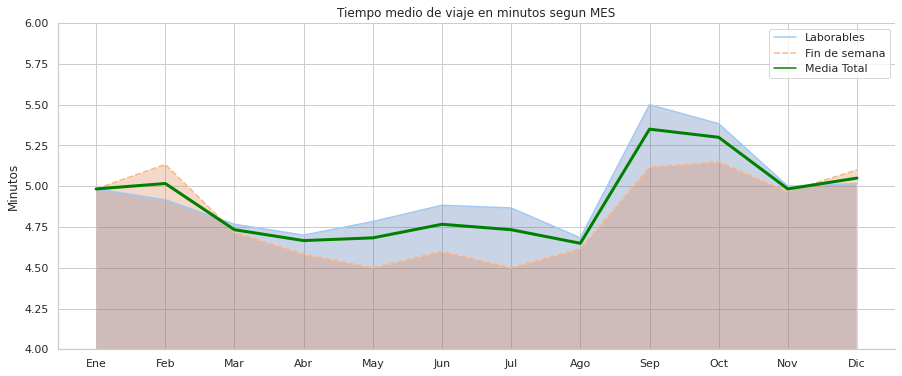

In [16]:
df_to_plot = pd.DataFrame()
df_to_plot["x"]             = df["date"]
df_to_plot["Media Total"  ] = df["mean_time_s_ALL"]/60
df_to_plot["Laborables"   ] = df["mean_time_s_WD" ]/60
df_to_plot["Fin de semana"] = df["mean_time_s_WE" ]/60

year = 2019
df_to_plot = df_to_plot[ (df_to_plot["x"] >= str(year)) & (df_to_plot["x"] <= str(year+1) ) ]
df_to_plot["x"] = ["Ene", "Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
df_to_plot = df_to_plot.reset_index(drop=True)

ymin = df_to_plot[["Media Total","Laborables","Fin de semana"]].min().min()
ymax = df_to_plot[["Media Total","Laborables","Fin de semana"]].max().max()
ylim_low  = math.floor( ymin-0.1*(ymax-ymin) )
ylim_high = math.ceil(  ymax+0.1*(ymax-ymin) )

plt.figure(figsize = (15,6))
fig = sns.lineplot(data=df_to_plot.drop(columns="Media Total").set_index("x"), palette="pastel", linewidth=1.5 )
fig.fill_between( df_to_plot["x"]  , 0 , df_to_plot["Laborables"], alpha=0.3)
fig.fill_between( df_to_plot["x"]  , 0 , df_to_plot["Fin de semana"], alpha=0.3)
fig = sns.lineplot(data=df_to_plot.drop(columns=["Laborables","Fin de semana"]).set_index("x"), linewidth=3 , palette=['green'] )

fig.set_title("Tiempo medio de viaje en minutos segun MES")
fig.set_xlabel("")
fig.set_ylabel("Minutos")
plt.ylim( ylim_low , ylim_high )



sns.despine()

In [17]:
for ind, label in enumerate(fig.get_xticklabels()):
    print(ind, label)
    if ind % 4 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

0 Text(0, 0, 'Ene')
1 Text(1, 0, 'Feb')
2 Text(2, 0, 'Mar')
3 Text(3, 0, 'Abr')
4 Text(4, 0, 'May')
5 Text(5, 0, 'Jun')
6 Text(6, 0, 'Jul')
7 Text(7, 0, 'Ago')
8 Text(8, 0, 'Sep')
9 Text(9, 0, 'Oct')
10 Text(10, 0, 'Nov')
11 Text(11, 0, 'Dic')


In [18]:
df_to_plot


,x,Media Total,Laborables,Fin de semana
0,Ene,4.983333,4.983333,4.983333
1,Feb,5.016667,4.916667,5.133333
2,Mar,4.733333,4.766667,4.716667
3,Abr,4.666667,4.700000,4.583333
4,May,4.683333,4.783333,4.500000
5,Jun,4.766667,4.883333,4.600000
6,Jul,4.733333,4.866667,4.500000
7,Ago,4.650000,4.683333,4.616667
8,Sep,5.350000,5.500000,5.116667
9,Oct,5.300000,5.383333,5.150000


In [19]:
search_by = {}
search_by["tipo"]    = "barrio"
search_by["origin"]  = 1
search_by["destiny"] = 2

search_by

{'tipo': 'barrio', 'origin': 1, 'destiny': 2}

In [20]:
search_by = {"tipo"    : search_by["tipo"]    ,
             "origin"  : search_by["destiny"] , 
             "destiny" : search_by["origin"]  }
search_by
             

{'tipo': 'barrio', 'origin': 2, 'destiny': 1}

In [21]:
# Parametrización para hacer gráficos:
# de momento manual, el objetivo es que sea a traves de streamlit

origen    = 1
destino   = 2

newdf = df[
#            (df.year     == ano       ) & 
#            (df.month    == mes       ) &
            (df.weekend  == finde     ) &
            (df.searchby == buscarpor ) &
            (df.origin   == origen    ) &
            (df.destiny  == destino   ) 
          ]
newdf = newdf.reset_index(drop=True)

AttributeError: 'DataFrame' object has no attribute 'weekend'

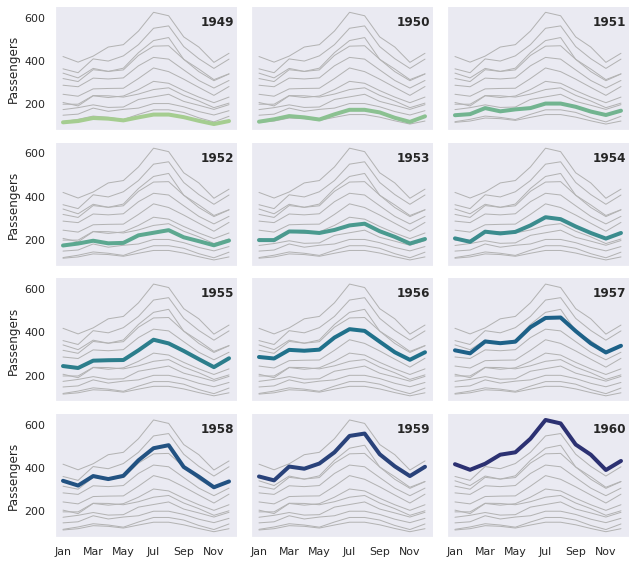

In [22]:
import seaborn as sns

sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

In [23]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [24]:
from datetime import datetime

print(datetime.today())
print(datetime.today().isoweekday())

2021-12-17 07:50:47.666128
5


In [25]:
from branca.colormap import linear


In [26]:
cmap_list

NameError: name 'cmap_list' is not defined

In [31]:
len(M_CP_df["origin"].unique())

223